## Setup

Import modules

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport
import sweetviz as sv

Define constants and import dataset

In [183]:
DATASET = '../udataset/filtered_stock_and_etfs.csv'
START_DATE = '2010-01'
END_DATE = '2022-12'

df = pd.read_csv(DATASET)

## Exploratory Data Analysis

Generate Profile report for the dataset using `ydata-profiling` library

Generate a profile report using the `sweetviz` library

Plot time series data of coca cola stock

Plot time series data of S&P500 index

## Create metric for growth

Convert the date column to date type

In [184]:
df['Date-Time'] = pd.to_datetime(df['Date-Time'])
df['YearMonth'] = df['Date-Time'].dt.to_period('M')

Sort the dataframe by ticker symbol and date

In [185]:
df = df.sort_values(by=['Ticker_Symbol', 'Date-Time'])

Get the monthly opening price for each stock and the opening price the previous month

In [186]:
month_open_prices = df.groupby(['Ticker_Symbol', 'YearMonth'])['Open'].first().reset_index()

month_open_prices['Prev_First_Open'] = month_open_prices.groupby('Ticker_Symbol')['Open'].shift(1)

Calculate the monthly growth for each stock

In [187]:
month_open_prices['Monthly_Growth (%)'] = ((month_open_prices['Open'] - month_open_prices['Prev_First_Open']) / month_open_prices['Prev_First_Open']) * 100

Calculate the cumulative monthly growth for each stock

In [188]:
month_open_prices['Cumulative_Growth (%)'] = month_open_prices.groupby('Ticker_Symbol')['Monthly_Growth (%)'].cumsum()

Drop the first row of each stock

In [189]:
growth = month_open_prices.dropna(subset=['Prev_First_Open'])
#growth['YearMonth']-=1

growth.to_csv('../udataset/stock_growth_month.csv', index=False)

## Plot growth for each symbol

/tmp/ipykernel_184010/214737088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-pac

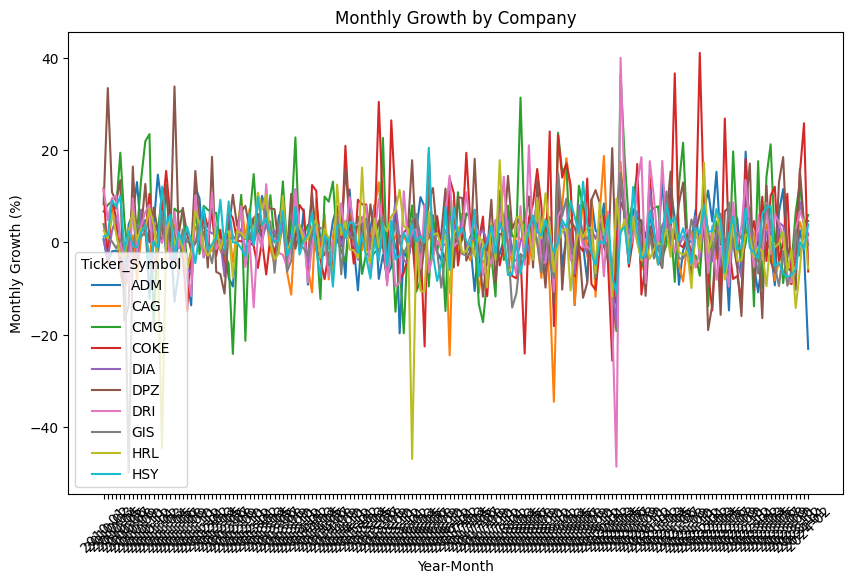

In [190]:
display_data = growth[growth['YearMonth'] >= pd.Period(START_DATE)]

display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)

company_subset = display_data['Ticker_Symbol'].unique()[:10] # First 10 companies
plot_data = display_data[display_data['Ticker_Symbol'].isin(company_subset)]


plt.figure(figsize=(10, 6)) # TODO - Note that graph is not well labeled
sns.lineplot(data=plot_data, x='YearMonth_str', y='Monthly_Growth (%)', hue='Ticker_Symbol')
plt.xticks(rotation=45)
plt.title('Monthly Growth by Company')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Growth (%)')
plt.show()

In [191]:
MARKETCAP = '../udataset/market_cap.csv'
cap_df = pd.read_csv(MARKETCAP)
cap_df['YearMonth'] = pd.to_datetime(cap_df['YearMonth'])
cap_df['YearMonth'] = cap_df['YearMonth'].dt.to_period('M')
fast_food_tickers = ['WEN', 'YUM', 'MCD', 'CMG', 'DPZ']
fast_food_tickers = ['YUM']
manufacturers = ['COKE', 'CAG', 'HRL', 'GIS', 'MNST', 'PEP', 'KDP', 'TSN', 'ADN', 'HSY', 'VMI', 'PPC']

#cap_df = cap_df[cap_df['Ticker'].isin(fast_food_tickers)]


In [192]:
# growth = pd.merge()
print(cap_df.columns)
cap_df = cap_df.rename(columns = {'Ticker': 'Ticker_Symbol'})
growth = pd.merge(growth, cap_df, on = ['YearMonth', 'Ticker_Symbol'], how='left')

Index(['YearMonth', 'Ticker', 'MarketCap'], dtype='object')


In [193]:
growth = growth[growth['YearMonth'] >= pd.Period(START_DATE)]
growth
#growth['market_cap'] = growth.apply(get_market_cap, axis=1)


Ticker_Symbol YearMonth    Open  Prev_First_Open  Monthly_Growth (%)  \
121            ADM   2010-01   31.48           31.250            0.736000   
122            ADM   2010-02   30.07           31.480           -4.479034   
123            ADM   2010-03   29.49           30.070           -1.928833   
124            ADM   2010-04   28.97           29.490           -1.763310   
125            ADM   2010-05   28.23           28.970           -2.554367   
...            ...       ...     ...              ...                 ...   
6200           YUM   2023-10  124.53          129.925           -4.152396   
6201           YUM   2023-11  121.88          124.530           -2.128001   
6202           YUM   2023-12  125.59          121.880            3.043978   
6203           YUM   2024-01  129.73          125.590            3.296441   
6204           YUM   2024-02  129.31          129.730           -0.323749   

      Cumulative_Growth (%)     MarketCap  
121              146.566170           NaN  
122              142.087136           NaN  
123              140.158303           NaN  
124              138.394994           NaN  
125              135.840627           NaN  
...                     ...           ...  
6200             243.938298  3.347400e+10  
6201             241.810297  3.540190e+10  
6202             244.854274  3.569160e+10  
6203             248.150715  3.597470e+10  
6204             247.826966  3.608970e+10  

[3841 rows x 7 columns]

In [194]:
growth['MarketCap_growth'] = growth['MarketCap']*growth['Monthly_Growth (%)']

In [195]:
growth[(growth['Ticker_Symbol'] == 'SPY') & (growth['YearMonth'] >= pd.Period(START_DATE)) & (growth['YearMonth'] <= pd.Period(END_DATE))]['Monthly_Growth (%)']


4419    1.307248
4420   -3.755451
4421    2.820157
4422    5.935252
4423    1.341256
          ...   
4570    8.654663
4571   -3.974093
4572   -8.096414
4573    8.048078
4574    4.775209
Name: Monthly_Growth (%), Length: 156, dtype: float64

In [196]:
overall_growth = []
year_month = []
start_year = int(START_DATE[:4])
end_year = int(END_DATE[:4])+1
for year in range(start_year, end_year):
    for month in range(1, 13):
        month_string = str(month)
        if len(month_string) == 1:
            month_string = '0' + month_string

        date_string = f'{str(year)}-{month_string}'
        year_month.append(date_string)

        overall_growth.append(growth[growth['YearMonth'] == pd.Period(date_string)]['MarketCap_growth'].sum()/growth[growth['YearMonth'] == pd.Period(date_string)]['MarketCap'].sum())

new_df = pd.DataFrame({'year-month': year_month, 'S&P_growth': growth[(growth['Ticker_Symbol'] == 'SPY') & (growth['YearMonth'] >= pd.Period(START_DATE)) & (growth['YearMonth'] <= pd.Period(END_DATE))]['Monthly_Growth (%)']})
new_df['processed_food_growth'] = overall_growth
new_df['growth_diff'] = (new_df['S&P_growth'] - new_df['processed_food_growth'])/(((new_df['processed_food_growth'])+new_df['S&P_growth'])/2)
new_df

year-month  S&P_growth  processed_food_growth  growth_diff
4419    2010-01    1.307248              -1.265111   122.093835
4420    2010-02   -3.755451              -1.907745     0.652531
4421    2010-03    2.820157              -1.973875    11.329633
4422    2010-04    5.935252              13.947290    -0.805937
4423    2010-05    1.341256              10.784823    -1.557563
...         ...         ...                    ...          ...
4570    2022-08    8.654663               6.965917     0.216221
4571    2022-09   -3.974093              -9.074485    -0.781755
4572    2022-10   -8.096414              -2.926301     0.938083
4573    2022-11    8.048078              10.727577    -0.285423
4574    2022-12    4.775209               8.394253    -0.549611

[156 rows x 4 columns]

In [197]:
UNEMPLOYMENTDATA = '../udataset/unemployment_month_US.csv'
unemployment_df = pd.read_csv(UNEMPLOYMENTDATA)
unemployment_df.columns = unemployment_df.columns.str.strip()
unemployment_df.columns = unemployment_df.columns.str.lower()

In [198]:
#unemployment_rate = []
#for year in range(2010, 2023):
    #unemployment_rate.append(unemployment_df[unemployment_df['year'] == year]['estimate'].sum()/unemployment_df[unemployment_df['year'] == year]['labour_force_pop'].sum()*100)
    #unemployment_rate.append(unemployment_df[unemployment_df['year'] == year]['estimate'].sum())


In [199]:
#unemployment_rate = [9.63, 8.95, 8.07, 7.37, 6.17, 5.28, 4.87, 4.36, 3.90, 3.67, 8.05, 5.35, 3.61]
new_df = pd.merge(new_df, unemployment_df, on=['year-month'])
new_df = new_df.drop(columns = ['unnamed: 0'])
new_df
#print(new_df['unemployment_rate'].expanding().corr(new_df['S&P_growth']))

year-month  S&P_growth  processed_food_growth  growth_diff  \
0      2010-01    1.307248              -1.265111   122.093835   
1      2010-02   -3.755451              -1.907745     0.652531   
2      2010-03    2.820157              -1.973875    11.329633   
3      2010-04    5.935252              13.947290    -0.805937   
4      2010-05    1.341256              10.784823    -1.557563   
..         ...         ...                    ...          ...   
151    2022-08    8.654663               6.965917     0.216221   
152    2022-09   -3.974093              -9.074485    -0.781755   
153    2022-10   -8.096414              -2.926301     0.938083   
154    2022-11    8.048078              10.727577    -0.285423   
155    2022-12    4.775209               8.394253    -0.549611   

     unemployment_rate  
0                  9.8  
1                  9.8  
2                  9.9  
3                  9.9  
4                  9.6  
..                 ...  
151                3.6  
152                3.5  
153                3.6  
154                3.6  
155                3.5  

[156 rows x 5 columns]

In [200]:
print(new_df[new_df.columns[1:]].corr())
new_df['expanding_correlation'] = new_df['unemployment_rate'].expanding().corr(new_df['growth_diff'])

                       S&P_growth  processed_food_growth  growth_diff  \
S&P_growth               1.000000               0.585204     0.033301   
processed_food_growth    0.585204               1.000000    -0.029208   
growth_diff              0.033301              -0.029208     1.000000   
unemployment_rate        0.041111               0.061086     0.140529   

                       unemployment_rate  
S&P_growth                      0.041111  
processed_food_growth           0.061086  
growth_diff                     0.140529  
unemployment_rate               1.000000  


In [201]:
new_df.to_csv('../udataset/growth_vs_unemployment_month.csv')